## Exit Survey Investigation

We will work with datasets from two Australian organizations, the Deparament of Education, Training and Employment (DETE) and Technical and Further Education (TAFE). 

The questions we will investigate are the reasons for employee turnover and differences in retention with age, in particular:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [9]:
import pandas as pd
import numpy as np

In [10]:
dete_survey = pd.read_csv("dete_survey.csv")

In [11]:
tafe_survey = pd.read_csv('tafe_survey.csv', encoding = 'cp1252')

In [12]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [13]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [14]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [15]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


#### Dete look

In [16]:
dete_survey['Aboriginal'].value_counts()

Yes    16
Name: Aboriginal, dtype: int64

In [17]:
dete_survey['Aboriginal'].isnull().sum()

806

In [18]:
dete_survey['Torres Strait'].isnull().sum()

819

In [19]:
dete_survey['Disability'].isnull().sum()

799

#### Tafe look

In [20]:
tafe_survey['CESSATION YEAR'].value_counts()

2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: CESSATION YEAR, dtype: int64

In [21]:
tafe_survey['Contributing Factors. Maternity/Family'].value_counts()

-                   411
Maternity/Family     26
Name: Contributing Factors. Maternity/Family, dtype: int64

There seem to be different strings representing null values, like '-' or 'Not Stated'

In [22]:
tafe_survey['Contributing Factors. Maternity/Family'].isnull().sum()

265

A cursory glance shows that there are several columns that are dominantly null values. Also the column headers seem somewhat non-uniform. And, finally, some columns where null values are represented in other forms. 

In [23]:
dete_survey = pd.read_csv('dete_survey.csv', 
                          na_values = 'Not Stated')

We were provided a list of columns to remove. The dropped columns aren't important for the questions we're looking to answer. 

In [24]:
col_drop_list = dete_survey.columns[28:49]

In [25]:
dete_survey_updated = dete_survey.drop(col_drop_list, axis=1)

In [26]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [27]:
col_drop_list_tafe = tafe_survey.columns[17:66]

In [28]:
tafe_survey_updated = tafe_survey.drop(col_drop_list_tafe,
                                      axis =1)

In [29]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    int64  
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

Made some adjustments to read in null values that were listed as 'Not Stated'. We also removed many columns that were understood to not be useful in our investigation. The 'drop' method was used to remove these columns. A list of the column indexes were passed in to the 'drop' method. 

In [30]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()

The line above formats the column headers. These are all the '.str' methods, telling the computer to read in the input as a string then manipulating the string in a specified way - replacing characters, stripping starting and ending spaces, and making all text lower case. 

In [31]:
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [32]:
print(tafe_survey_updated.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in ye

In [33]:
map_index = {'Record ID': 'id',
                    'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype', 
'Gender. What is your Gender?': 'gender', 
'CurrentAge. Current Age': 'age', 
'Employment Type. Employment Type': 'employment_status', 
'Classification. Classification': 'position', 
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [34]:
tafe_survey_updated = tafe_survey_updated.rename(mapper=map_index, axis=1)

In [35]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [36]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Above, we made the column names more consistent. This was done with two different approaches. Broadly with .str methods on the DETE survey, then discretely with .rename. 

In [37]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [38]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [39]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [40]:
dete_resignations_bool = dete_survey_updated.separationtype.str.contains('Resignation').copy()

In [41]:
dete_resignations = dete_survey_updated[dete_resignations_bool]

Creating a boolean mask for the Dete survey. This is basically going through and identifying rows that contain the word 'Resignation' in the separationtype column. Then that list of rows is used to pick the matching rows in the full dataset - a mask. Then reassigned to dete_resignations. 

In [42]:
tafe_resignations_bool = tafe_survey_updated.separationtype.str.contains('Resignation', na = False).copy()

In [43]:
tafe_resignations = tafe_survey_updated[tafe_resignations_bool]

Above we looked for columns that were related only to resignations, since that's the information we are interested in. The '.copy()' method needed to be used to avoid a common error called 'SettingWithCopyWarning'.

Side note: Noticed in the line up above that series can be called from df's with two different types of notation either ['column_name'] or .column_name

In [44]:
dete_resignations.cease_date.value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [45]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(str).str.extract("([1-2][0-9]{3})").astype("float")
dete_resignations["cease_date"].value_counts()

C:\Users\Bryce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

The code above is making the input into a string then extracting any lines it sees that are numbers ranged one to two then numbers ranging zero to nine. That zero to nine extraction happens 3 times because of the 3 in curly brackets. The number will be output as a type 'float'. Hence the '.0' at the end of the number. 

A big learning point for me is that the code will still run, even with the 'caveats' warning. I have been running into this error in personal code projects. 

In [46]:
dete_resignations.dete_start_date.value_counts().sort_index(ascending = True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

Counting values in the dete_start_date column. Then sorting them. 

In [47]:
dete_resignations.cease_date.value_counts().sort_index(ascending = True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

Counting values in the cease_date column. Then sorting them. 

In [48]:
tafe_resignations.cease_date.value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Dete was hiring 1-6 employees annually from about 1960 to 2000. A slight uptick in hiring occurred in 2000 and really took hold in 2004. An incredible number of resignations were turned in to Dete in 2012 and 2013.  

Tafe resignations were high just a year before Dete in 2011

In [49]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

C:\Users\Bryce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Code still runs even with the error. 

In [50]:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

Just above here, I was calculating the years of service. This will be used to compare to years of service in Tafe and see if any patterns can be gleaned from resignations and years of service. 

In [51]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [52]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [53]:
def update_vals(x):
    if pd.isnull(x):
        return np.nan
    elif x is '-':
        return False
    else: 
        return True

In [54]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna = False)

C:\Users\Bryce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Code still works. And mapping a function to read in the dissatisfaction inputs as booleans (True or False). 

In [55]:
tafe_resignations['dissatisfied'].value_counts(dropna = False)

False    241
True      91
True       8
Name: dissatisfied, dtype: int64

In [56]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(axis = 1, skipna = False)

C:\Users\Bryce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Reading in the booleans from any of a number of columns that contain information about job dissatisfaction. 

In [57]:
dete_resignations['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [58]:
dete_resignations_up = dete_resignations.copy()

In [59]:
tafe_resignations_up = tafe_resignations.copy()

Had to do the .copy() thing again to avoid the SettingWithCopy Warning. 

This work above consolidated the dissatisfaction metrics. Tafe required a function to be run to make the responses comparable.

The .any() method was used to to read in responses from 3 different series within the dataframe and build a new boolean series out of those responses. For example, if one series contained a true value, then the new series value would be true. 

In [60]:
dete_resignations_up['institute'] = 'DETE'

In [61]:
tafe_resignations_up['institute'] = 'TAFE'

The two lines above were run so there there would be a row identifier of which with survey you are dealing. 

In [62]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up],
                    ignore_index = True)

The way we've concatenated the databases, is to basically vertically stack them. 

In [63]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 57 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    int64  
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             308 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [64]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

Dropping columns with less than 500 non null values. Cuts number of columns from 53 to 10. 

In [65]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    int64  
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   institute_service  563 non-null    object 
 4   dissatisfied       643 non-null    object 
 5   institute          651 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 30.6+ KB


In [66]:
combined_updated.shape

(651, 6)

In [67]:
combined_updated.institute_service.value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


The two resignations columns were combined so that resignations and the years of service can be linked. Patterns hopefully understood. 

In [68]:
combined_updated['institute_service'].astype(str)

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
       ... 
646     5-6
647     1-2
648     nan
649     5-6
650     3-4
Name: institute_service, Length: 651, dtype: object

In [69]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated["institute_service_up"] = combined_updated["institute_service_up"].astype("float")

Having a little trouble understanding how (r'(\d+)) is working.

In [70]:
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [71]:
def career_stages(x):
    if pd.isnull(x):
        return np.nan
    elif x>=11:
        return 'veteran'
    elif 7<=x<=10:
        return 'established'
    elif 3<=x<=6:
        return 'experienced'
    else:
        return 'new'

Writing a function to bin the data by years of service. 

In [72]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(career_stages)

In [73]:
combined_updated['service_cat'].value_counts()

new            193
experienced    172
veteran        136
established     62
Name: service_cat, dtype: int64

Grouped the experience into different categories. 

In [74]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
True       8
Name: dissatisfied, dtype: int64

In [75]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(value=False)

In [84]:
dissat_props = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')

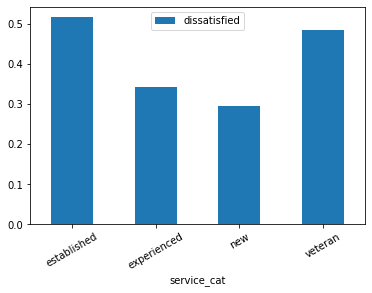

In [86]:
%matplotlib inline
dissat_props.plot(kind = 'bar', rot = '30')

The final analysis shows that established and veteran employees expressed dissatisfaction at a higher rate. There's a noticeable difference of ~20% more of the resignations in the established and veteran groups expressing dissatisfaction. 